In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from keras.optimizers import SGD
from tensorflow import keras
from keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split

In [2]:
class Autoencoder(Model):
    def __init__(self,hidden_neurons):
        super(Autoencoder, self).__init__()
        # Encoder of the Auto-encoder
        self.encoder = keras.models.Sequential()
        self.encoder.add(layers.Input(shape=(28, 28, 1)))
        self.encoder.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
        self.encoder.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))
        self.encoder.add(layers.Conv2D(hidden_neurons, kernel_size=(3, 3), activation='relu'))
        
        self.decoder = keras.models.Sequential()
        self.decoder.add(layers.Conv2DTranspose(hidden_neurons, kernel_size=(3,3), activation='relu'))  
        self.decoder.add(layers.Conv2DTranspose(16, kernel_size=(3,3), activation='relu'))  
        self.decoder.add(layers.Conv2DTranspose(32, kernel_size=(3,3), activation='relu'),)
        self.decoder.add(layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))
        
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [29]:
train,test,valid={},{},{}
(train["x"], train["y"]), (test["x"], test["y"]) = mnist.load_data()
train["y"] = to_categorical(train["y"])
test["y"] = to_categorical(test["y"])
input_size = train["x"].shape[1]*train["x"].shape[1]
train["x"] = train["x"].reshape(train["x"].shape[0],train["x"].shape[1],train["x"].shape[2],1)
test["x"] = test["x"].reshape(test["x"].shape[0],test["x"].shape[1],test["x"].shape[2],1)
train["x"] = train["x"].astype('float32')/255
test["x"] = test["x"].astype('float32')/255
train["x"], valid["x"], train["y"], valid["y"]=train_test_split(train["x"], train["y"], test_size=0.3, random_state=42)
print(train["x"].shape)
print(train["y"].shape)
print(test["x"].shape)
print(test["y"].shape)
print(valid["x"].shape)
print(valid["y"].shape)

(42000, 28, 28, 1)
(42000, 10)
(10000, 28, 28, 1)
(10000, 10)
(18000, 28, 28, 1)
(18000, 10)


In [5]:
# construct a plot that plots and saves the training history
def loss_plot(History, epochs):
  N = np.arange(0, epochs)
  plt.plot(N, History.history["loss"], label="train_loss")
  plt.title("Training Loss vs epochs")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")
  plt.show()

In [6]:
def model_call(opt,loss_1):
    temp={"loss":[],"hidden_neurons":[],"model":[]}
    epochs=10
    history = []
    for i in range(5,9):
        print("for hidden neuron",i)
        autoencoder = Autoencoder(i)
        autoencoder.compile(optimizer=opt, loss=loss_1)
        H = autoencoder.fit(train["x"], train["x"], epochs = epochs, shuffle=True, validation_data=(valid["x"], valid["x"]))
        history.append(H)
        temp["loss"].append(H.history["loss"][-1])
        temp["hidden_neurons"].append(i)
        temp["model"].append(autoencoder)

        print("Training Loss vs epochs plot")
        loss_plot(H,epochs)
        print()
        print()
    return temp
    

for hidden neuron 5
Epoch 1/10
1313/1313 [==============================] - 40s 5ms/step - loss: 0.0207 - val_loss: 4.1003e-04
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 3.6570e-04 - val_loss: 2.5220e-04
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 2.3802e-04 - val_loss: 1.7696e-04
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 1.7649e-04 - val_loss: 2.2028e-04
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 1.4631e-04 - val_loss: 1.1088e-04
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 1.1027e-04 - val_loss: 8.4178e-05
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 7.7819e-05 - val_loss: 6.5695e-05
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 6.2148e-05 - val_loss: 4.5314e-05
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 5.1556e-05 - val_loss: 4.82

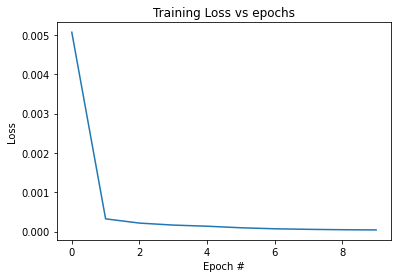



for hidden neuron 6
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0224 - val_loss: 3.9470e-04
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 3.5038e-04 - val_loss: 2.4911e-04
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 2.3107e-04 - val_loss: 1.6872e-04
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 1.6312e-04 - val_loss: 1.2682e-04
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 1.2900e-04 - val_loss: 1.0514e-04
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 9.7312e-05 - val_loss: 9.2201e-05
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 7.7673e-05 - val_loss: 5.5960e-05
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 6.3221e-05 - val_loss: 5.0047e-05
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 5.4647e-05 - val_loss: 5.1

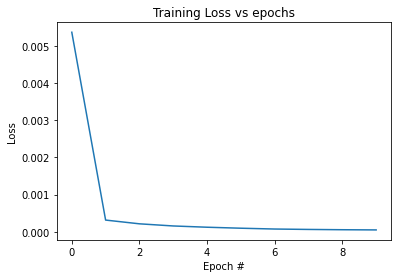



for hidden neuron 7
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0221 - val_loss: 3.7411e-04
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 3.3068e-04 - val_loss: 2.1744e-04
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.9537e-04 - val_loss: 1.3854e-04
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.2634e-04 - val_loss: 8.9559e-05
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 9.1053e-05 - val_loss: 6.5577e-05
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 6.9401e-05 - val_loss: 6.0931e-05
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 5.2908e-05 - val_loss: 4.0478e-05
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 4.3348e-05 - val_loss: 4.1960e-05
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 3.7016e-05 - val_loss: 2.8

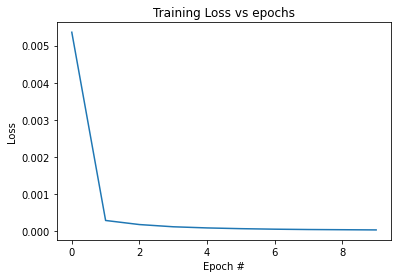



for hidden neuron 8
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0201 - val_loss: 4.3632e-04
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 3.9872e-04 - val_loss: 2.9262e-04
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 2.7159e-04 - val_loss: 2.1545e-04
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 2.1414e-04 - val_loss: 1.8326e-04
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.9233e-04 - val_loss: 1.6266e-04
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 1.6795e-04 - val_loss: 1.5738e-04
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.5674e-04 - val_loss: 1.4561e-04
Epoch 8/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.4633e-04 - val_loss: 1.3293e-04
Epoch 9/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.4202e-04 - val_loss: 1.3

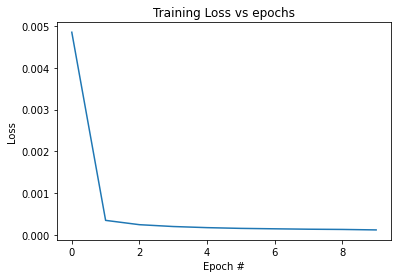

In [7]:
ADAM=model_call('adam',losses.MeanSquaredError())

In [15]:
for keys in range(0,len(ADAM["hidden_neurons"])):
    print("For Hidden Neuron:",ADAM["hidden_neurons"][keys])
    print(ADAM["model"][keys])
    loss = ADAM["model"][keys].evaluate(test["x"],test["x"])
    print("Test reconstruction loss: ",loss)
    print()

For Hidden Neuron: 5
313/313 [==============================] - 1s 2ms/step - loss: 4.0374e-05
Test reconstruction loss:  4.037412509205751e-05

For Hidden Neuron: 6
313/313 [==============================] - 1s 2ms/step - loss: 4.2846e-05
Test reconstruction loss:  4.284579335944727e-05

For Hidden Neuron: 7
313/313 [==============================] - 1s 2ms/step - loss: 2.3637e-05
Test reconstruction loss:  2.3636945115868002e-05

For Hidden Neuron: 8
313/313 [==============================] - 1s 2ms/step - loss: 1.1256e-04
Test reconstruction loss:  0.00011255632853135467



for hidden neuron 5
Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0154 - val_loss: 3.9899e-04
Epoch 2/10
1313/1313 [==============================] - 7s 6ms/step - loss: 5.0417e-04 - val_loss: 3.5954e-04
Epoch 3/10
1313/1313 [==============================] - 7s 6ms/step - loss: 2.7837e-04 - val_loss: 1.8071e-04
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 2.0032e-04 - val_loss: 2.4234e-04
Epoch 5/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.6154e-04 - val_loss: 1.5344e-04
Epoch 6/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.4163e-04 - val_loss: 1.2306e-04
Epoch 7/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.2649e-04 - val_loss: 1.0953e-04
Epoch 8/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.1461e-04 - val_loss: 1.6637e-04
Epoch 9/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.0568e-04 - val_loss: 8.497

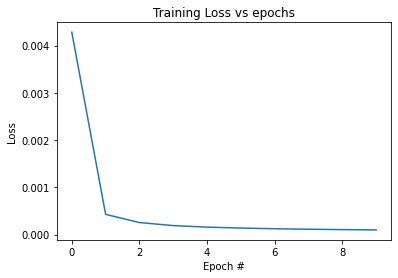



for hidden neuron 6
Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0221 - val_loss: 0.0014
Epoch 2/10
1313/1313 [==============================] - 7s 6ms/step - loss: 9.8652e-04 - val_loss: 5.4665e-04
Epoch 3/10
1313/1313 [==============================] - 7s 6ms/step - loss: 5.2258e-04 - val_loss: 2.8087e-04
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 3.6238e-04 - val_loss: 3.6725e-04
Epoch 5/10
1313/1313 [==============================] - 7s 6ms/step - loss: 2.8114e-04 - val_loss: 1.7822e-04
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 2.2604e-04 - val_loss: 2.8507e-04
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.8522e-04 - val_loss: 1.3820e-04
Epoch 8/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.5562e-04 - val_loss: 1.5749e-04
Epoch 9/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.3692e-04 - val_loss: 1.1892e

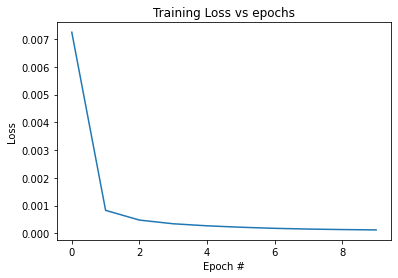



for hidden neuron 7
Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0147 - val_loss: 8.2456e-04
Epoch 2/10
1313/1313 [==============================] - 7s 6ms/step - loss: 5.5555e-04 - val_loss: 3.7657e-04
Epoch 3/10
1313/1313 [==============================] - 7s 6ms/step - loss: 2.8833e-04 - val_loss: 2.7454e-04
Epoch 4/10
1313/1313 [==============================] - 7s 6ms/step - loss: 2.0668e-04 - val_loss: 3.3287e-04
Epoch 5/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.6508e-04 - val_loss: 1.4442e-04
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.4093e-04 - val_loss: 1.5479e-04
Epoch 7/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.2628e-04 - val_loss: 1.3815e-04
Epoch 8/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.1700e-04 - val_loss: 1.0545e-04
Epoch 9/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.0692e-04 - val_loss: 1.2

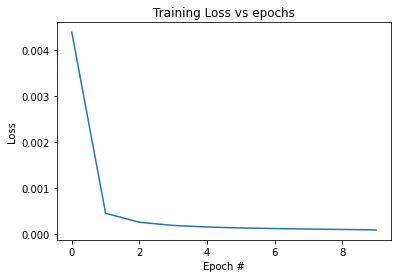



for hidden neuron 8
Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0139 - val_loss: 6.0289e-04
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 4.7608e-04 - val_loss: 2.0414e-04
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 2.6337e-04 - val_loss: 2.0305e-04
Epoch 4/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.8584e-04 - val_loss: 1.2436e-04
Epoch 5/10
1313/1313 [==============================] - 7s 6ms/step - loss: 1.4215e-04 - val_loss: 1.6623e-04
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1833e-04 - val_loss: 1.0991e-04
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 1.0135e-04 - val_loss: 9.7031e-05
Epoch 8/10
1313/1313 [==============================] - 7s 5ms/step - loss: 8.9316e-05 - val_loss: 1.0012e-04
Epoch 9/10
1313/1313 [==============================] - 7s 5ms/step - loss: 8.1996e-05 - val_loss: 7.6

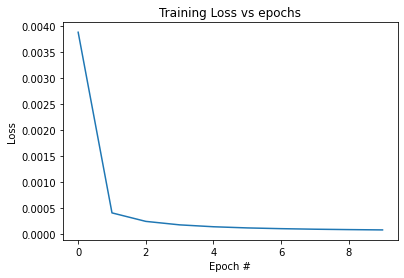

In [16]:
from keras.optimizers import RMSprop
RMS=model_call(RMSprop(),losses.MeanSquaredError())

In [17]:
for keys in range(0,len(RMS["hidden_neurons"])):
    print("For Hidden Neuron:",RMS["hidden_neurons"][keys])
    print(RMS["model"][keys])
    loss = RMS["model"][keys].evaluate(test["x"],test["x"])
    print("Test reconstruction loss: ",loss)
    print()

For Hidden Neuron: 5
313/313 [==============================] - 1s 2ms/step - loss: 1.0872e-04
Test reconstruction loss:  0.0001087162017938681

For Hidden Neuron: 6
313/313 [==============================] - 1s 2ms/step - loss: 1.6975e-04
Test reconstruction loss:  0.00016974745085462928

For Hidden Neuron: 7
313/313 [==============================] - 1s 2ms/step - loss: 9.5790e-05
Test reconstruction loss:  9.57901866058819e-05

For Hidden Neuron: 8
313/313 [==============================] - 1s 2ms/step - loss: 6.5903e-05
Test reconstruction loss:  6.590304110432044e-05



for hidden neuron 5
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1227 - val_loss: 0.0190
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0147 - val_loss: 0.0084
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0079 - val_loss: 0.0067
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 10/10
1313/1313 [==============================] - 6s 5m

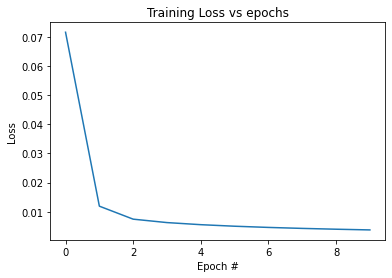



for hidden neuron 6
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1105 - val_loss: 0.0138
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0114 - val_loss: 0.0077
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0059 - val_loss: 0.0053
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 10/10
1313/1313 [==============================] - 6s 

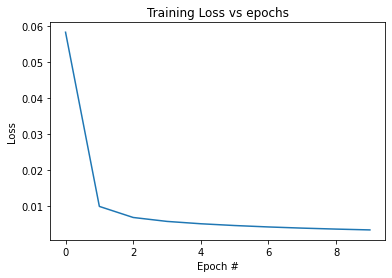



for hidden neuron 7
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1392 - val_loss: 0.0561
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0391 - val_loss: 0.0173
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0146 - val_loss: 0.0089
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0081 - val_loss: 0.0062
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 10/10
1313/1313 [==============================] - 6s 

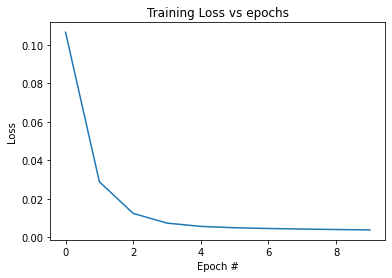



for hidden neuron 8
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1418 - val_loss: 0.0286
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0218 - val_loss: 0.0115
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0102 - val_loss: 0.0074
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0069 - val_loss: 0.0058
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 10/10
1313/1313 [==============================] - 6s 

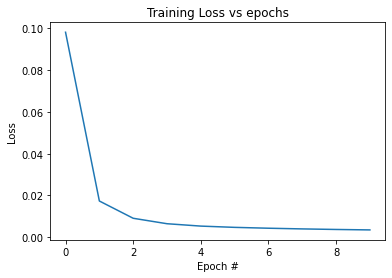

In [18]:
from keras.optimizers import SGD
SGDO=model_call(SGD(),losses.MeanSquaredError())

In [19]:
for keys in range(0,len(SGDO["hidden_neurons"])):
    print("For Hidden Neuron:",SGDO["hidden_neurons"][keys])
    print(SGDO["model"][keys])
    loss = SGDO["model"][keys].evaluate(test["x"],test["x"])
    print("Test reconstruction loss: ",loss)
    print()

For Hidden Neuron: 5
313/313 [==============================] - 1s 2ms/step - loss: 0.0036
Test reconstruction loss:  0.0035528305452317

For Hidden Neuron: 6
313/313 [==============================] - 1s 2ms/step - loss: 0.0031
Test reconstruction loss:  0.003119212109595537

For Hidden Neuron: 7
313/313 [==============================] - 1s 2ms/step - loss: 0.0036
Test reconstruction loss:  0.003587940242141485

For Hidden Neuron: 8
313/313 [==============================] - 1s 2ms/step - loss: 0.0033
Test reconstruction loss:  0.0033443928696215153



for hidden neuron 5
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0734 - val_loss: 0.0058
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/10
1313/1313 [==============================] - 6s 5m

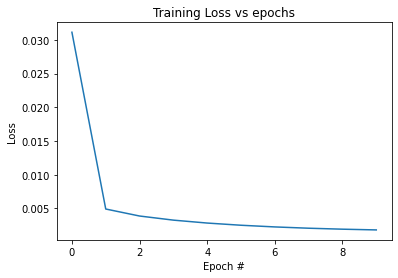



for hidden neuron 6
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1059 - val_loss: 0.0074
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0062 - val_loss: 0.0045
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 10/10
1313/1313 [==============================] - 6s 

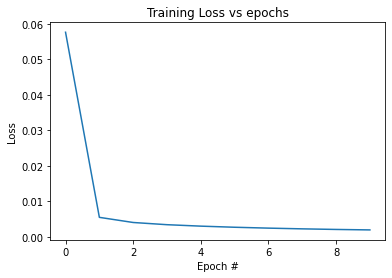



for hidden neuron 7
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1060 - val_loss: 0.0080
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0064 - val_loss: 0.0045
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/10
1313/1313 [==============================] - 6s 

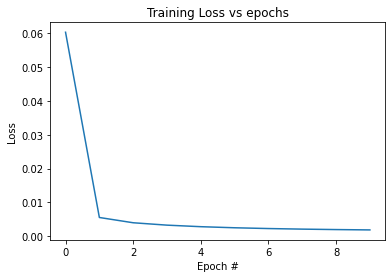



for hidden neuron 8
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0669 - val_loss: 0.0060
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/10
1313/1313 [==============================] - 6s 

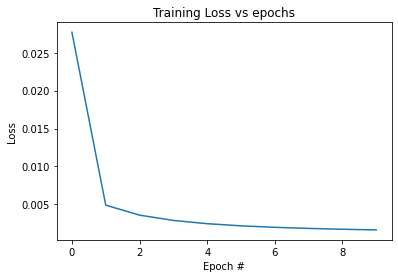

In [20]:
SGDW=model_call(SGD(momentum = 0.7),losses.MeanSquaredError())

In [21]:
for keys in range(0,len(SGDW["hidden_neurons"])):
    print("For Hidden Neuron:",SGDW["hidden_neurons"][keys])
    print(SGDW["model"][keys])
    loss = SGDW["model"][keys].evaluate(test["x"],test["x"])
    print("Test reconstruction loss: ",loss)
    print()

For Hidden Neuron: 5
313/313 [==============================] - 1s 2ms/step - loss: 0.0017
Test reconstruction loss:  0.0017341745551675558

For Hidden Neuron: 6
313/313 [==============================] - 1s 2ms/step - loss: 0.0018
Test reconstruction loss:  0.0018104598857462406

For Hidden Neuron: 7
313/313 [==============================] - 1s 2ms/step - loss: 0.0018
Test reconstruction loss:  0.001808457775041461

For Hidden Neuron: 8
313/313 [==============================] - 1s 2ms/step - loss: 0.0016
Test reconstruction loss:  0.001556580187752843



In [22]:
from sklearn.decomposition import PCA
train,test={},{}
(train["x"], train["y"]), (test["x"], test["y"]) = mnist.load_data()
train["y"] = to_categorical(train["y"])
test["y"] = to_categorical(test["y"])
input_size = train["x"].shape[1]*train["x"].shape[1]
train["x"] = train["x"].reshape(60000,784)
test["x"] = test["x"].reshape(10000,784)
train["x"] = train["x"].astype('float32')/255
test["x"] = test["x"].astype('float32')/255
pca = PCA(100)
pca.fit(train["x"])
train["x_pca"] = pca.transform(train["x"])
test["x_pca"] = pca.transform(test["x"])
print(train["x_pca"].shape)
print(test["x_pca"].shape)


(60000, 100)
(10000, 100)


In [28]:
from sklearn.metrics import mean_squared_error
inverse_data = pca.inverse_transform(test["x_pca"])
loss1=mean_squared_error(test["x"], inverse_data)

In [30]:
loss2= ADAM["model"][2].evaluate(test["x"],test["x"])

313/313 [==============================] - 1s 2ms/step - loss: 2.3637e-05


In [31]:
print("test reconstruction loss between PCA reconstructed data and test data =",loss1)
print("test reconstruction loss between autoencoder reconstructed data and test data =",loss2)


test reconstruction loss between PCA reconstructed data and test data = 0.005638699
test reconstruction loss between autoencoder reconstructed data and test data = 2.3636945115868002e-05
